<a href="https://colab.research.google.com/github/isaachfp/bi-master/blob/master/Conf_Dados/20201124_Ex4/dbscan_stremming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vamos a usar varias stremming 

Primeiro vamos subir os dados.

Os dados são reais. São métricas do AWS CloudWatch para EC2 e RDS

In [12]:
from google.colab import drive
#drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/BI-Master_PUC-RJ/20201124_CONF/'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

# Vamos a carregar as bibliotecas

In [13]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
print(check_output(["ls", "realAWSCloudwatch/"]).decode("utf8"))

ec2_cpu_utilization_24ae8d.csv
ec2_cpu_utilization_53ea38.csv
ec2_cpu_utilization_5f5533.csv
ec2_cpu_utilization_77c1ca.csv
ec2_cpu_utilization_825cc2.csv
ec2_cpu_utilization_ac20cd.csv
ec2_cpu_utilization_c6585a.csv
ec2_cpu_utilization_fe7f93.csv
ec2_disk_write_bytes_1ef3de.csv
ec2_disk_write_bytes_c0d644.csv
ec2_network_in_257a54.csv
ec2_network_in_5abac7.csv
elb_request_count_8c0756.csv
grok_asg_anomaly.csv
iio_us-east-1_i-a2eb1cd9_NetworkIn.csv
rds_cpu_utilization_cc0c53.csv
rds_cpu_utilization_e47b3b.csv



## ec2_cpu_utilization_825cc2: Da Amazon Web Services (AWS)
monitorar o uso da CPU - ou seja, o uso médio da CPU em um determinado cluster. Quando
o uso é alto, a AWS acelera uma nova máquina e usa menos máquinas quando o uso
é baixo.

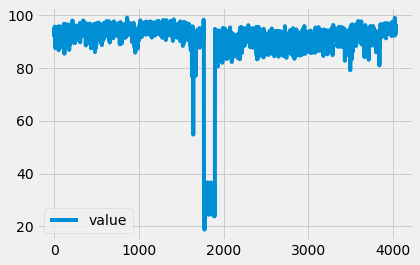

In [14]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import warnings
import itertools
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fpath = "../input/"
fname = "iap.csv"
fpath = "realAWSCloudwatch/"
fname = "ec2_cpu_utilization_825cc2.csv"
# fname = "grok_asg_anomaly.csv"

fullPath = fpath + fname

def parser(x):
	return dt.datetime.strptime(x, "%Y-%m")
# return dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")


data = pd.read_csv(fullPath)
data.plot()


para trabalhar de maneira mais facil vamos trabalhar com pontos

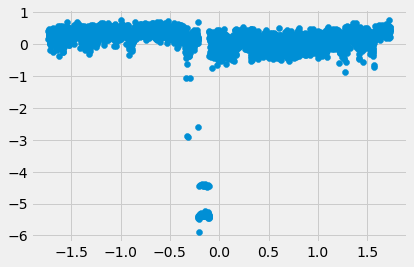

In [15]:

a = []
x = []
y=[]
for i in range(0, len(data)-1):
    a.append([i,data["value"][i]])    

X = a

X = StandardScaler().fit_transform(X)
for i in range(0,len(X)):
    x.append(X[i][0])
    y.append(X[i][1])

plt.scatter(x,y)
plt.show()


## Agora vamos a utilizar DBSCAN

Estimated number of clusters: 1


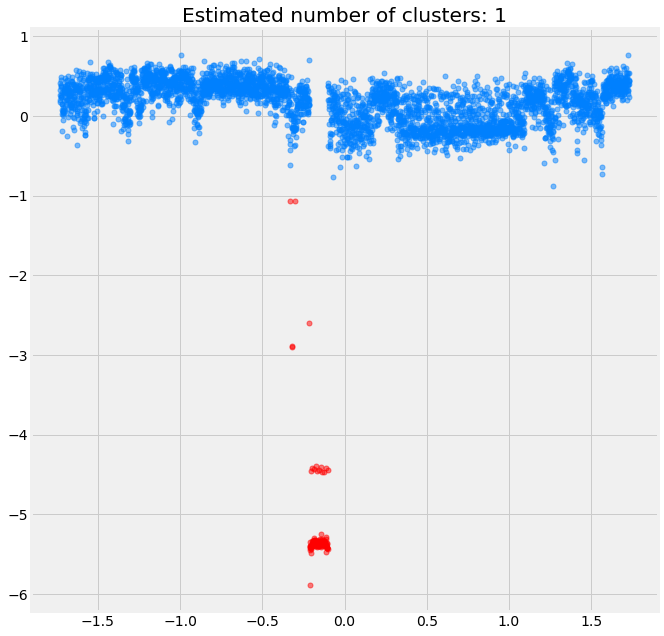

In [16]:
db = DBSCAN(eps=0.5, min_samples=200).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

unique_labels = set(labels)
plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
for k in unique_labels:
    col=[0,0.5,1,1]
    if k == -1:
        col = [1, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col),markersize=5, alpha=0.5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col), markersize=5, alpha=0.5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()